In [1]:
library(ggplot2)
library(gridExtra)
library(FactoMineR)
library(SensoMineR) 
library(fmsb) # for radar plots

# See https://github.com/IRkernel/IRkernel/issues/545 for reasons for the following code block
imports <- parent.env(getNamespace('SensoMineR'))
unlockBinding('dev.new', imports)
assign('dev.new', function() {}, envir = imports)

# Quantitative Descriptor Analysis Trial at the A\*STAR Biotransformation Innovation Platform

During the month of January, year 2018, a trial [Quantitative Descriptive Analysis](https://en.wikipedia.org/wiki/Quantitative_Descriptive_Analysis) panel, jointly organized by **Aaron Thong**, Flavor and Fragrance Analytical Chemist at the A\*STAR Biotransformation Innovation Platform, and **Augustine Koh**, Understudy CEO at VK Creative Aromatics International, was conducted on researchers in the labs of the A\*STAR Biotransformation Innovation Platform. This panel was focused on Pandan flavors and products. [Pandan](https://en.wikipedia.org/wiki/Pandanus_amaryllifolius), more properly called _Pandanus amaryllifolius_, is a green tropical plant whose leaves are commonly used in Southeast Asian cuisine as flavorings.

### Objectives for the Trial

Pandan exhibits different flavors between its raw and cooked forms. One of main objectives for this panel was to explore how raw and cooked pandan would exhibit different quantitative flavor profiles, and how the various flavors or products would align to these two profiles. Furthermore, this panel was also a good opportunity to expose researchers in Biotrans to sensory science, and explore whether a relatively untrained panel could still discriminate clearly between these profiles.

### Preparation for the Trial

Prior to the actual panel runs, an orientation session was conducted where participants smelled both raw Pandan leaves, and cooked Pandan prepared in two ways:

- **(1)** Raw Pandan leaves were placed in a dry test tube and the test tube was then immersed in a boiling water bath for 10 mins and kept sealed, with these cooked leaves as the sample to be smelled.
- **(2)** Raw Pandan leaves were placed in a pot of water, boiled, with that water collected as the sample to be smelled.

The orientation session allowed participants to exchange ideas on how to describe the flavors of both cooked and raw Pandan, and brainstorm for a basic set of descriptor terms that applied to both forms of Pandan. This set was refined by Aaron and Augustine, through a more focussed discussion, into the following list with partial definitions:

| Descriptor | Definition|
|:------|:------|
|Creamy | Reminescent of Coconut waxy/fatty |
|Sweet | Associated with floral and fruity sources |
| Savoury | Conjures thoughts of nutty and beany foods |
| Green | Herbal, Grassy, Fresh and Earthy notes |
| Pungent | Strong sulfury notes|

The actual panel run was conducted roughly one week after the orientation session. New participants who did not attend the orientation session joined, while some participants who previously attended the orientation did not show up, resulting in a mixed panel comprising of 12 persons.

### Products used in the Panel

The products used in the trial were:

| Product Name | Description   |
|:------|:------|
| Raw Pandan  | Raw pandan leaves purchased from a nearby supermarket |
| Cooked Pandan  | Pandan leaves cooked through method **(1)** defined above |
| PF1  | Pandan flavor from a local flavor and fragrances manufacturer touted to possess a stronger green profile|
| PF2  | Pandan flavor from a local flavor and fragrances manufacturer touted to possess a sweeter and more pungent profile|
| PE  | Raw natural Pandan extract from a regional natural flavor and fragrance ingredients supplier|

The panel comprised of two sessions, involving the following of products:
 
 |Session No. | Products   |
|:------:|:------|
| 1  | Raw Pandan, Cooked Pandan, PF1,  PF2, PE|
|  2 | PF1,  PF2, PE|

The purpose of including the actual Pandan leaves in the first sesssion was to again provide a basic reference scent for helping panelists to score the various flavors according to the different descriptors. The identities of the Pandan products, PF1, PF2 and PE, were kept hidden and unknown to the panelists, until only after the two sessions were completed and the scores were collected. The scores for each descriptor ranged from 0 to 10, with 0 being the weakest, and 10 being the strongest.

For the rest of this notebook, we will do a dive into the dataset from this trial, and evaluate our objectives in terms of the results. Along the way introduce some basic data analysis in R.

# Reading in Data and Generating Basic Analyses

We read in the dataset as a dataframe. Columns where we designate as [categorical variables](https://en.wikipedia.org/wiki/Categorical_variable), we mark as `factor`, while all our other columns are quantitative variables which we mark as `integers` since we implemented a discrete scoring scale rather than a continuous scoring scale for our descriptors.

In [2]:
dset <- read.table("pandan_session1.csv", sep=",", header=TRUE, 
                   colClasses= c("factor", "factor", "factor", "factor", "integer", "integer", "integer", "integer", "integer"))
head(dset)

Panelist,Product,Session,Trained,Creamy,Sweet,Savoury,Green,Pungent
Panelist1,PF1,2,1,8,2,8,5,0
Panelist1,PE,2,1,4,3,7,8,0
Panelist1,PF2,2,1,9,3,7,6,0
Panelist2,PF1,2,1,1,5,8,4,0
Panelist2,PE,2,1,0,8,0,6,0
Panelist2,PF2,2,1,5,6,3,4,2


In [3]:
summary(dset)

       Panelist           Product   Session Trained     Creamy      
 Panelist1 : 8   Cooked Pandan:12   1:60    0:40    Min.   : 0.000  
 Panelist10: 8   PE           :24   2:36    1:56    1st Qu.: 0.750  
 Panelist11: 8   PF1          :24                   Median : 4.000  
 Panelist12: 8   PF2          :24                   Mean   : 3.969  
 Panelist2 : 8   Raw Pandan   :12                   3rd Qu.: 7.000  
 Panelist3 : 8                                      Max.   :10.000  
 (Other)   :48                                                      
     Sweet           Savoury          Green           Pungent     
 Min.   : 0.000   Min.   :0.000   Min.   : 0.000   Min.   :0.000  
 1st Qu.: 1.000   1st Qu.:0.000   1st Qu.: 2.000   1st Qu.:0.000  
 Median : 3.000   Median :3.000   Median : 4.500   Median :0.500  
 Mean   : 4.042   Mean   :3.021   Mean   : 4.646   Mean   :1.969  
 3rd Qu.: 7.000   3rd Qu.:4.250   3rd Qu.: 7.000   3rd Qu.:3.000  
 Max.   :10.000   Max.   :9.000   Max.   :10.0

As we had designated the _Panelist_, _Product_, _Session_, and _Trained_ columns as categorical, R was able provide us a more suitable summary of counts for these columns. We can see that the behavior of `summary()` otherwise for columns of quantiative variables is to compute some basic statistical measures.

In [4]:
table(dset$Product, dset$Panelist)

               
                Panelist1 Panelist10 Panelist11 Panelist12 Panelist2 Panelist3
  Cooked Pandan         1          1          1          1         1         1
  PE                    2          2          2          2         2         2
  PF1                   2          2          2          2         2         2
  PF2                   2          2          2          2         2         2
  Raw Pandan            1          1          1          1         1         1
               
                Panelist4 Panelist5 Panelist6 Panelist7 Panelist8 Panelist9
  Cooked Pandan         1         1         1         1         1         1
  PE                    2         2         2         2         2         2
  PF1                   2         2         2         2         2         2
  PF2                   2         2         2         2         2         2
  Raw Pandan            1         1         1         1         1         1

This shows us that each and every panelist evaluated Cooked Pandan and Rresh Pandan only once, (since these products were only given in Session 1) and PF1, PF2, and PE twice (since these products were given in both sessions 1 and 2).

### A Basic Function in R: How many of our panelists are trained?

Here we take a slight detour from the analysis to introduce an example of constructing a function in R. 

Our function will help us compute a simple statistic: how many panelists were trained, and how many were untrained?

First we perform boolean indexing to segregate trained panelists from untrained ones, using the famous and fundamental R syntax for indexing a [vector from a data frame](http://www.cookbook-r.com/Basics/Indexing_into_a_data_structure/). We observe that there are two levels to the data in this vector, as `Panelist` is a categorical variable which we have set above; each panelist with his or her own name is a distinct category.

In [5]:
untned <- dset[dset$Trained == 0,]
head(untned)

,Panelist,Product,Session,Trained,Creamy,Sweet,Savoury,Green,Pungent
7,Panelist3,PF1,2,0,3,5,6,4,2
8,Panelist3,PE,2,0,1,1,1,10,2
9,Panelist3,PF2,2,0,2,4,7,5,1
10,Panelist4,PF1,2,0,10,9,2,8,8
11,Panelist4,PE,2,0,0,10,0,5,0
12,Panelist4,PF2,2,0,10,9,2,8,9


In [6]:
untpnl <- factor(untned$Panelist)
untpnl

[1] Panelist3  Panelist3  Panelist3  Panelist4  Panelist4  Panelist4 
 [7] Panelist6  Panelist6  Panelist6  Panelist7  Panelist7  Panelist7 
[13] Panelist11 Panelist11 Panelist11 Panelist7  Panelist7  Panelist7 
[19] Panelist7  Panelist7  Panelist4  Panelist4  Panelist4  Panelist4 
[25] Panelist4  Panelist3  Panelist3  Panelist3  Panelist3  Panelist3 
[31] Panelist6  Panelist6  Panelist6  Panelist6  Panelist6  Panelist11
[37] Panelist11 Panelist11 Panelist11 Panelist11
Levels: Panelist11 Panelist3 Panelist4 Panelist6 Panelist7

Wrapping the above code into a predefined sequence of steps, we construct a function that returns a vector, where the first element is the number of untrained panelists, and the second element is the number of trained panelists. 

We call the function on our dataset, and print out the counts.

In [7]:
train_count <- function(data) {
    
    a <- dset[data$Trained == 0,]
    b <- factor(a$Panelist)
    untrained <- nlevels(b) 
    return(c(untrained, nlevels(data$Panelist) - untrained))
    
}

In [8]:
unt <- train_count(dset)
sprintf("The Panel comprises of %d untrained panelists, and %d trained panelists", unt[1], unt[2])

[1] "The Panel comprises of 5 untrained panelists, and 7 trained panelists"

# Visualizing the Score Distributions for all the Descriptors

During manual collation of the dataset, we observed a poor consensus. In other words, for any given flavor, very few people gave the same scores for each descriptor. Examining the score distribution for each flavor will thus be the first step of our investigation. This is commonly done through boxplots.

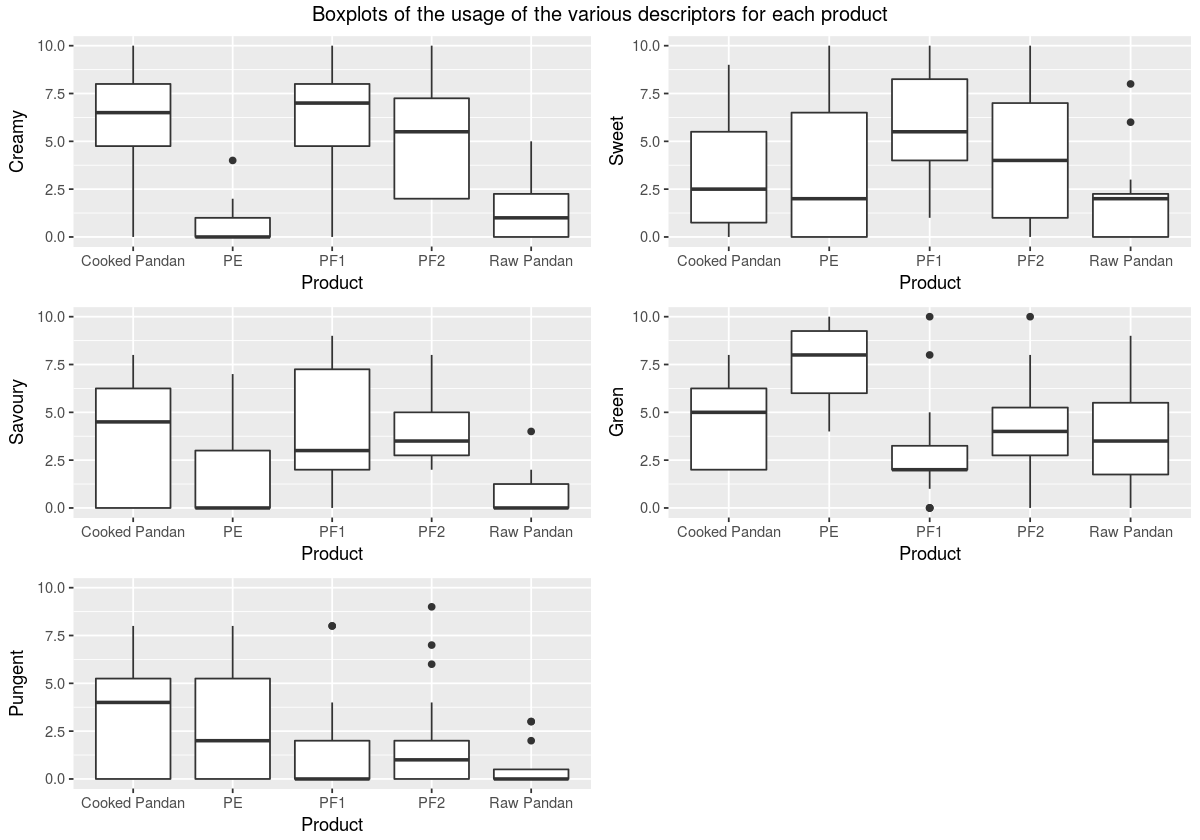

In [9]:
cbp <- ggplot(data = dset, mapping = aes(x = Product, y = Creamy)) + geom_boxplot()
swbp <- ggplot(data = dset, mapping = aes(x = Product, y = Sweet)) + geom_boxplot()
svbp <- ggplot(data = dset, mapping = aes(x = Product, y = Savoury)) + geom_boxplot() + ylim(0,10)
gbp <- ggplot(data = dset, mapping = aes(x = Product, y = Green)) + geom_boxplot()
pbp <- ggplot(data = dset, mapping = aes(x = Product, y = Pungent)) + geom_boxplot() + ylim(0,10)
options(repr.plot.width=10, repr.plot.height=7)
grid.arrange(cbp,swbp,svbp,gbp,pbp, ncol=2, 
             top = "Boxplots of the usage of the various descriptors for each product")

These plots confirm our hunch for some flavors. For example we can see that for Cooked Pandan, across all descriptors, the boxplot is wide and there is a higher variance in the scoring of descriptor attributes for Cooked Pandan, indicating that different panelists were not so consistent in their scoring of the attributes for this product. Poor panel consensus is less of an issue for Raw Pandan, as we see narrow boxplots implying less variance in its scoring, with the exception of a few outliers.

Evaluting consensus manually can be tricky. There might be many more effects to consider, and visualizing boxplots for each is not efficient nor reliable (as we might forget to consider one effect while focussing on another), so we want a better way to compute the statistics and visualize with metrics. [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance) is the tool for this, which we introduce now.


# Assessing Panel Performance Statistically

We define our basic ANOVA model, applicable to each and every descriptor, for the entire panel, as:

$$Y_{iks} \sim \mu + \alpha_i + \beta_k + \gamma_s + \alpha\beta_{ik} + \alpha\gamma_{is} + \beta\gamma_{ks} + \epsilon_{iks}$$

where
- $\alpha_i$ is the  $i^{th}$ coefficient associated with the Product effect;
- $\beta_k$ is the  $k^{th}$ coefficient associated with the Panelist effect;
- $\gamma_s$ is the  $s^{th}$ coefficient associated with the Session effect;
- $\alpha\beta_{ik}$ is the $ik^{th}$ coefficient associated with the Product-Panelist interaction;
- $\alpha\gamma_{is}$ is is the $is^{th}$ coefficient associated with the Product-Session interaction;
- $\beta\gamma_{ks}$ is the $ks^{th}$ coefficient associated with the Panelist-Session interaction;
- $\epsilon_{iks}$ denotes the error term.

We will explain and evaluate the various effects and interactions after computing the statistics on the data below.

The `SensoMineR` package provides the convenience functions `panelperf()` and `coltable()` enabling us to automatically perform an ANOVA on all of the sensory descriptors continuous variables in our dataset, and to subsequently, conveniently visualize the p-value outputs of this ANOVA.

In [10]:
res.panelperf <- panelperf(dset, firstvar = 5,
                           formul="~ Product + Panelist + Session + Product:Panelist + Product:Session + Panelist:Session")


Indexing out the `p.value` component from `res.panelperf`, we get a matrix where the rows correspond to the sensory attributes of the data set, the columns to the effects tested in the ANOVA model, and in which each element corresponds to the p-value associated with the F -test of an effect for a given attribute. We sort the values column wise such that columns with the smallest _p-values_ are placed first from the left.

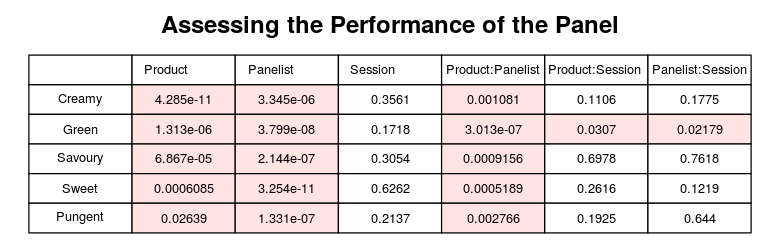

In [11]:
options(repr.plot.width=6.5, repr.plot.height=2)
p_value.res <- res.panelperf$p.value[order(res.panelperf$p.value[,1]),]
coltable(p_value.res, main.title="Assessing the Performance of the Panel")

## Reviewing the Panel Performance Results

Here is a brief discussion about the results (_p-values_) for the various effects and interactions, when we let our signficance level be at $0.05$. If a _p-value_ $< 0.05$, then the effect for that particular sensory descriptor is signficant. Conversely, if a _p-value_ $>0.05$, then the effect for that particular sensory descriptor is not significant.

- **Product Effect:** This effect is generally of main interest in assessing panel performance. If signficiant, it means that the panel has discriminated the products with respect to the sensory descriptor. The remarkably small _p-values_ indicate that the panelists have differentiated the various products particuarly well, for all the sensory descriptors. One could argue that the products in our panel were obvious enough to allow for an easy differentiation. 


- **Panelist Effect:** This effect indicates whether panelists use the scoring scale similarly or not. The low _p-values_ indicate that the this effect is significant, i.e. each panelist has used his/her own scale to judge the products. This is related to the lack of consensus but it is of less interest because it does not account for different.


- **Session Effect:** This effect indicates whether the scoring scale is used similarly from one session to another. The high _p-values_, indicate that the session has an insignificant effect on the results (i.e. there is no significant difference between sessions 1 and 2). This is related to repeatability but it is of less interest because it also does not account for different products.


- **Product-Panelist Interaction:** This interaction indicates whether products are perceived similarly by different panelists. Evident from the low _p-values_, which represent a high level of significance for this effect, there is poor consensus among the panelists for all the descriptors. This is likely due to the relative lack of training that our panelists received.


- **Product-Session Interaction:** This interaction indicates whether products are perceived similarly from one session to the other. This interaction is insignficant enough for all the descriptors, meaning that the panel has perceived the products similarly across all sessions. With the exception of _Green_, the panel is generally repeatable between sessions 1 and 2. This is what we should expect from a good sensory panel, and is likely due to the relatively short break (only about 15 minutes) between the running of both sessions. The reason why _Green_ might have been the exception could be due to a strong carry over effect for the _Green_ attribute. A longer break between sessions 1 and 2 might help reduce this effect.


- **Panelist-Session Interaction:** This interaction indicates whether some panelists use the scoring scale differently from one session to another, and is generally treated with less interest. In our results, we see a similar pattern of significance in _p-values_ as for this interaction as for the _Product-Session Interaction_, which means in general, with the exception of the _Green_ descriptor, that our panelists are indeed using the scoring scale differently between sessions 1 and 2.

# Evaluating Performance at the Level of Individual Panelists

Proceeding further with our analysis of the panel performance, we are now interested to quantify how well each and every panelist agrees with the overall panel in scoring the various products.

We will use the `paneliperf()` function of `SensoMineR`, which is very similar to `panelperf()` introduced earlier. `paneliperf()` produces the results of two ANOVA models applied to all the continuous variables of a given data set: the first ANOVA applies the first model to the panel, while the second ANOVA applies the second model to each panelist. Hence, the first model considered is the same one as in the previous part, whereas the second model, specified through the `formul.j` argument, is defined as:

$$Y_{is} \sim \mu + \alpha_i + \gamma_s + \epsilon_{is}$$

where:

- $\alpha_i$ is the $i$th coefficient associated with the product effect
- $\gamma_s$ is the $s$th coefficient associated with the session effect
- $\epsilon_{is}$ is denotes the residual

In [12]:
res.paneliperf <- paneliperf(dset,
                           formul="~ Product + Panelist + Session + Product:Panelist + Product:Session + Panelist:Session",
                             formul.j="~Product+Session", col.j=1, firstvar=5, synthesis=TRUE)

Warning message in summary.lm(aov(formule, data = donnee, subset = (donnee[, col.j] == :
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(aov(formule, data = donnee, subset = (donnee[, col.j] == :
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(aov(formule, data = donnee, subset = (donnee[, col.j] == :
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(aov(formule, data = donnee, subset = (donnee[, col.j] == :
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(aov(formule, data = donnee, subset = (donnee[, col.j] == :
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(aov(formule, data = donnee, subset = (donnee[, col.j] == :
“essentially perfect fit: summary may be unreliable”Warning message in summary.lm(aov(formule, data = donnee, subset = subset, na.action = na.exclude)):
“essentially perfect fit: summary may be unreliable”W

For our purpose of evaluating the performance of individual panelists, we will examine the matrix `agree.ind` that can be obtained from the `res.paneliperf` object. `agree.ind` contains the correlation coefficients between the adjusted means for the Product effect calculated for each panelist, on the one hand, and for the panel on the other hand are stored. This matrix therefore corresponds to the notion of consensus between each panelist and the whole panel.

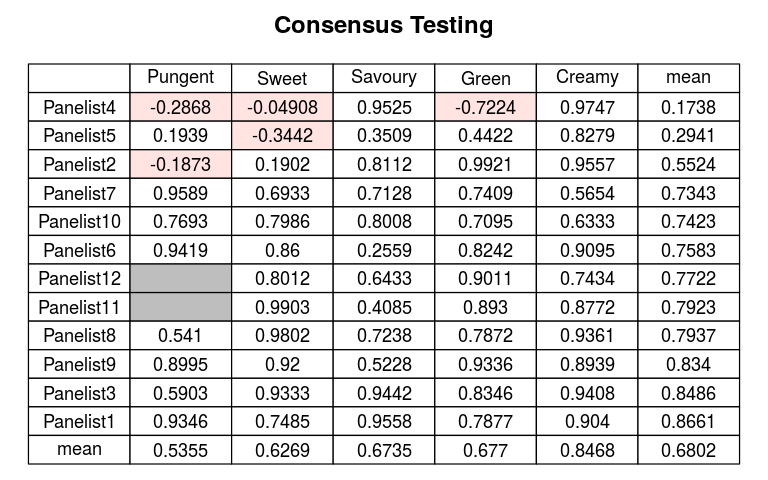

In [13]:
options(repr.plot.width=6.4, repr.plot.height=4)
agree.sorted <- magicsort(res.paneliperf$agree.ind, method = 'mean')
coltable(agree.sorted, main.title="Consensus Testing")

### Estimating the Extent of Consensus for each Individual Panelist

The table above has been sorted according to mean values through the `magicsort()` function.

Firstly we consider excluding _Pungent_ since we observe significantly uneven agreement, and quite a few disagreements, among all the panelists for this descriptor. This observation consistent with the boxplot for _Pungent_ generated earlier above, where we see that _Pungent_ has the most number of outlier scores among all the descriptors.

Taking into account the other remaining four descriptors, overall we observe that Panelist1 was in strongest consensus with the panel overall, having the strongest correlations to the panel average scores for all the descriptors. 

On the other hand, the Panelist4 has negative correlations between his scores and the panel average for the _Sweet_ and _Green_ attributes. He will need to be retrained on these specific descriptors in order to achieve stronger consensus with the rest of the panel. This issue also applies to Panelist5 for the _Sweet_ descriptor.

We are now able to quantify the agreement of every panelist with the overall panel, for each descriptor. This helps us to better plan for, and personalize the consensus trainings, to improve agreement across the entire panel.


# Generating the Sensory Profile of the Products

For the last part of our analysis, we would like to obtain a visualization showing the sensory profiles of the products tested by our panel. This is ultimately the goal of a Quantitative Descriptive Analysis panel; to quantify, for each product, its intensity or strength for every attribute. 

We utilize the `decat()` function to systematically perform ANOVA on each sensory attribute using a given model, which for the purposes here, only requires us to declare the _Product_ and _Panelist_ effects.

Although `decat()` provides many different ouput results, we only need the adjusted mean scores for each descriptor on every product. This adjusted mean is computed by taking into account the _Product_ effect on the scores for each descriptor.

In [14]:
res.decat <- decat(dset, formul = "~Product+Panelist", firstvar=5, lastvar=ncol(dset), graph=FALSE)

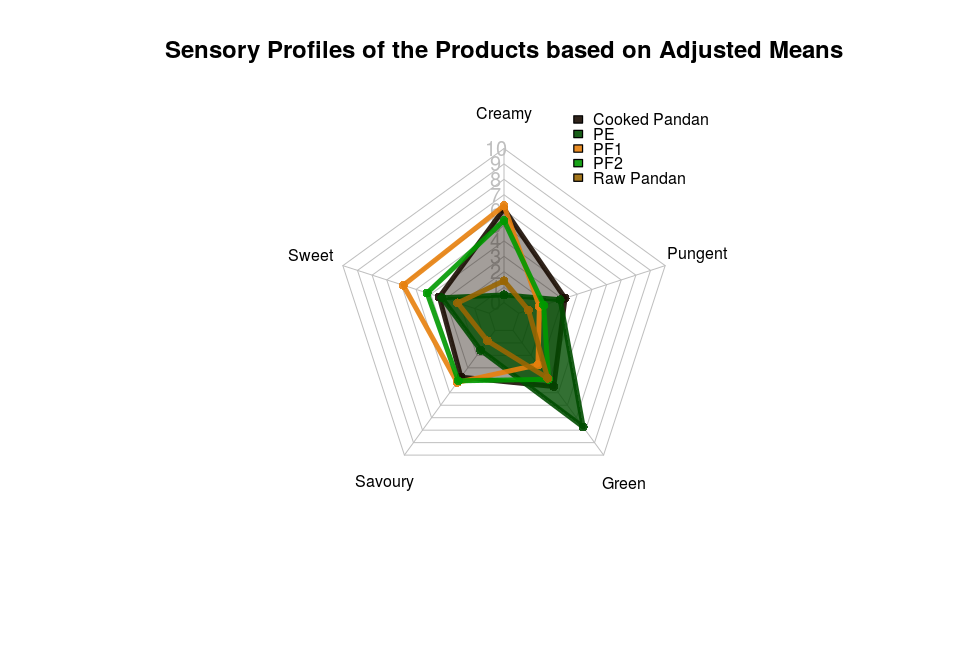

In [15]:
options(repr.plot.width=8, repr.plot.height=5.5)

colors_border=c( rgb(0.1,0.05,0.01,0.9), rgb(0.0,0.3,0.0,0.9) , rgb(0.9,0.5,0.05,0.9), 
                 rgb(0.0,0.6,0.0,0.9),rgb(0.6,0.4,0.01,0.9) )

colors_in=c(rgb(0.1,0.05,0.01,0.4), rgb(0.0,0.3,0.0,0.8) , rgb(0.9,0.5,0.05,0.0), 
                 rgb(0.0,0.6,0.0,0.0), rgb(0.6,0.4,0.01,0.0))

# prepare a dataframe with two redundant rows of max to min values 0 to 10
# these are necessary
datf <- data.frame(res.decat$adjmean) # We only need the adjusted means for each descriptor for every product
datf <- rbind(rep(10,5) , rep(0,5) , datf) # add the two redundant rows of max to min values

radarchart( datf  , axistype=1 , seg=10,
    #customize polygons
    pcol=colors_border ,  pfcol=  colors_in, plwd=4 , plty=1,
    #customize the grid
    cglcol="grey", cglty=1, axislabcol="gray", caxislabels=seq(0,10), cglwd=0.8,
    #customize labels
    vlcex=0.8,
    title = "Sensory Profiles of the Products based on Adjusted Means"
    )

# datf[-c(1,2),] removes the two redundant rows of max and min values
legend(x=0.7, y=1, legend = rownames(datf[-c(1,2),]), bty = "n", pch=20 , fill = colors_border,
       col=colors_in , text.col = "black", cex=0.8, pt.cex=0, xjust =0.5, yjust = 0.5)

### Interpreting the Sensory Profiles as Visualized on the Radar Chart

Here we observe something pretty remarkable. There are two kinds of general pentagonal shapes in the plot, one corresponding to the profile of Cooked Pandan, and the other being that of Raw Pandan.

Even with almost zero formal training, the panel could significantly differentiate between Raw and Cooked Pandan and more importantly, was able to describe PF1 and PF2 as being closer to Cooked Pandan, and PE as being closer to Raw Pandan. This should be no surprise, as the earlier results of the _Product_ effect from our ANOVA model have already indicated to us that the various products were well discriminated across all attributes.

This result validates the conjecture that Pandan flavors from the local flavors and fragrances manufacturer emulate Cooked Pandan, and that the Pandan extract from the regional natural flavor and fragrances ingredients supplier follows Raw Pandan closely. It also implies that even with minimal training, if a panel could be expected to generate reasonably trustworthy data to meet simple goals, then what more could be achieved with a rigorously trained panel? The power of statistics is also demonstrated here, as its usefulness in eliminating unwanted noise and effects to reveal the truth about the data is quite amazing!

# Future Works

Future works could include the following:

- Performing a [Principal Components Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) on the adjusted means of sensory profiles. PCA is an important method that allows us to generate visualizations where the products are positioned as points close to one another if their sensory profiles are similar, and far apart if their sensory profiles are different. An additional clustering step can then be performed to categorize the products.

- A more detailed analysis that segregates the dataset between the trained panelists (those who had attended the orientation session) and the untrained panelists (those who did not attend the orientation session but showed up for the actual panel). The statistical tests will be performed separately on those two groups, and the results compared.

- The panel perceived PF1 as being more _Sweet_ and less _Green_ than PF2, when it should have been the converse, as touted by the manufacturer. The analysis that's been performed here is not sufficient to account for this discrepancy. Apart from a more advanced analysis that might involve breaking up into per sessions, it might also be necessary to explore more sophisticated experimental designs such as manipulating at the order in which the panelists smell the products.

# Attributions

This entire analysis would not have been possible without the extensive examples and guidance from the book [_Analyzing Sensory Data with R_](http://www.sensorywithr.org/), by **Sébastien Lê** and **Thierry Worch**. This book introduces the main concepts in the statistical analysis of sensory data, and covers some basics of the R programming language through the use of the `SensoMineR` library for sensory data analysis.  We highly recommend it to anyone who would like to dig deeper into this area.


# Questions and Correspondence

Any questions and correspondence pertaining to this notebook and the analyses presented here may be directed simultaneously to both **Aaron Thong** (aaron_thong@biotrans.a-star.edu.sg) and **Augustine Koh** (ak.augustine.koh@gmail.com).